# **ML - Прогнозы и предсказания**

# Описание проекта

## 1. Задача проекта<a id="step1"></a>

На основе данных о посетителях сети фитнес-центров спрогнозировать вероятность оттока для каждого клиента в следующем месяце, сформировать с помощью кластеризации портреты пользователей

## 2. Оглавление <a id="step2"></a>

[1. Задача проекта](#step1)

[2. Оглавление](#step2)

[3. Описание данных](#step3)

[4. Загрузка данных](#step4)

[5. Исследовательский анализ данных (EDA)](#step5)

[6. Модель прогнозирования оттока клиентов](#step6)

[7. Кластеризация клиентов](#step7)

[8. Общие выводы](#step8)

[9. Рекомендации](#step9)

## 3. Описание данных<a id="step3"></a>

    
«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц и информацию на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента.

## 4. Загрузка данных<a id="step4"></a>

In [1]:
#установим последнюю версию библиотеки сиборн
!pip install seaborn -U

Requirement already up-to-date: seaborn in c:\users\ko66k\.conda\envs\practicum\lib\site-packages (0.11.1)


In [2]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [3]:
#прочитаем файлы

    gym = pd.read_csv(filename)

gym

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [4]:
gym.shape

(4000, 14)

In [5]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [6]:
# Наличие дубликатов
gym.duplicated().sum()

0

In [7]:
# Приведем названия столбцов к нижнему регистру
gym.columns = gym.columns.str.lower()
gym.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

** ** **
1. В данных 4000 строк, 14 столбцов
2. Все признаки выражены числами, пропущенных значений нет, дубликаты отсутствуют
2. 4 признака выражены вещественными числами, 10 - целочисленными
4. Названия приведены к нижнему регистру

## 5. Исследовательский анализ данных (EDA)<a id="step5"></a>

In [8]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


## ***
1. Женщин на 1% больше чем мужчин
2. 84% клиентов живут или работают рядом с фитнесом
3. 48% клиентов работают в компаниях-партнерах
4. 31% клиентов купили абонемент с промо от друга
5. 90% предоставили номер телефона
6. длительность контрактов от 1 месяца до 12 месяцев, среднее значение 4.68 месяца. При этом медианное значение контракта 1 месяц. Распределение сдвинуто влево.
7. 41% клиентов посещают групповые занятия
8. Средний возраст клиента 29 лет (от 18 до 41 года), медианное значение возраста также 29 лет.
9. В среднем каждый клиент тратит в месяц на дополнительные услуги фитнеса 146 единиц (минимум 0.14, максимум 552 единицы)
10. Среднее значение месяцев до конца контракта 4.32
11. Среднее значение времени с первого обращения: 3.72 месяца, медиан 3 месяца (самый долгий клиент 31 месяц)
12. Частота посещений фитнеса в среднем 1.88 раза в неделю (разброс от 0 до 6 раз в неделю) за все время действия абонемента
13. Частота посещений фитнеса в среднем 1.76 раза в неделю за предыдущий месяц. То есть частота посещений снижается со временем.
14. 26% клиентов покинули фитнес в текущем месяце.

In [9]:
#посмотрим средние покаатели по признакам, тех кто ушел и кто остался
gym.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [10]:
gym['churn'].mean()

0.26525

26% фактический отток клиентов в текущем месяце

In [11]:
sns.set_palette('muted') 

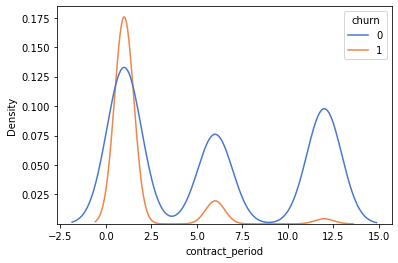

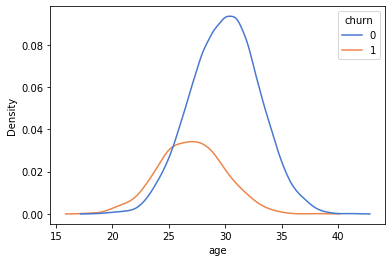

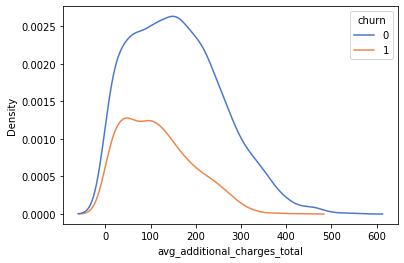

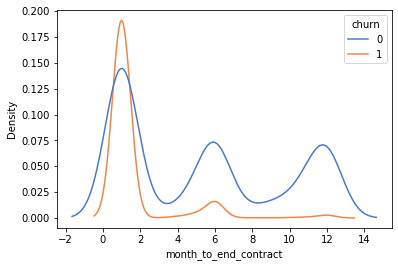

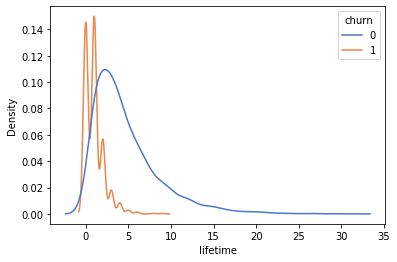

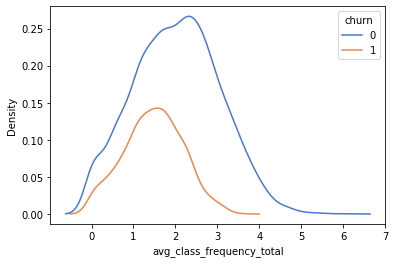

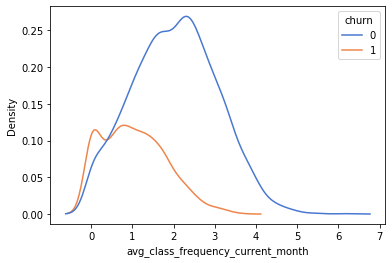

In [12]:
#построим распределения для всех небинарных признаков
kde_list =['contract_period', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month']

for col in kde_list:
    sns.kdeplot(data = gym, x=col, hue='churn') #ваш код здесь
    plt.show()

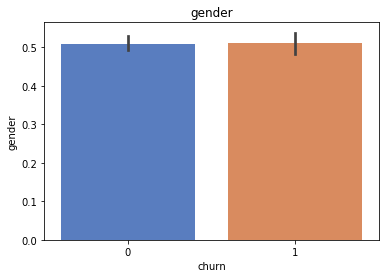

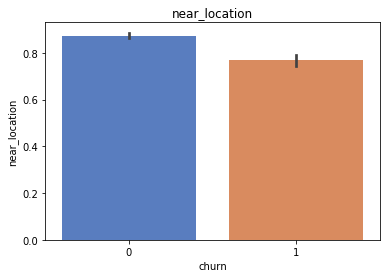

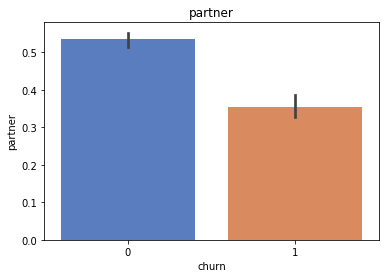

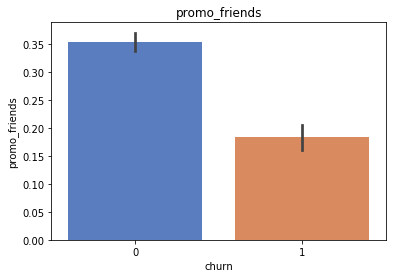

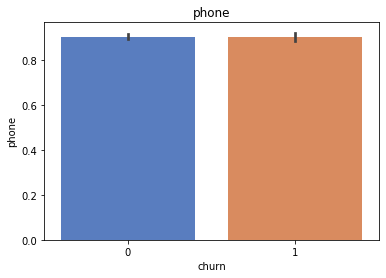

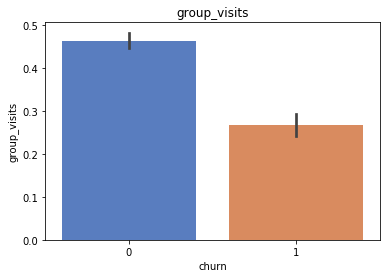

In [13]:
# Построим столбчатые диаграммы для бинарных признаков
bi_list =['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'group_visits']

for col in bi_list:
    fig, ax = plt.subplots()
    sns.barplot(x=gym['churn'], y=gym[col])
    ax.set_title(col) 
    plt.show()

## ***
Среди тех кто ушел и кто остался можно сделать следующие выводы (все сравнения указаны в порядке остался / ушел):
1. распределение по возрасту одинаковое
2. 87% против 76% среди тех кто живет рядом
3. 53 % с партнерсокой программой остались, среди тех кто ушел 35% с партнерской программой
4. у тех кто остался 5.74, среди тех кто ушел среднее время конракта 1.72
5. 46% и 26% посещали групповые занятия соответственно
6. возраст 30 лет и 27 лет
7. средний чек на допуслуги: 158 и 115
8. время до конца контракта: 5.28 и 1.66. В основном, уходит тот, кому до конца абонемента осталось совсем чуть чуть.
9. лайфтайм 4.71 и 0.99. то есть люди позанимавшись месяц, поняли что им это не подходи в силу каких-то причин и уходят.
10. Посещение финтнеса в неделю за весь период: 2 и 1.47 в среднем 
11.Посещение финтнеса в неделю за весь период: 2 и 1 в среднем. У тех кто уходит и посещаемось падает.

В целом все показатели тех, кто оказывается в оттоке ниже. Интересно что и средний возраст тех кто уходит меньше. Видимо пока не так интересно ходить в фитнес.

In [14]:
# Построим матрицу корреляций
gym_corr = gym.corr()
gym_corr

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


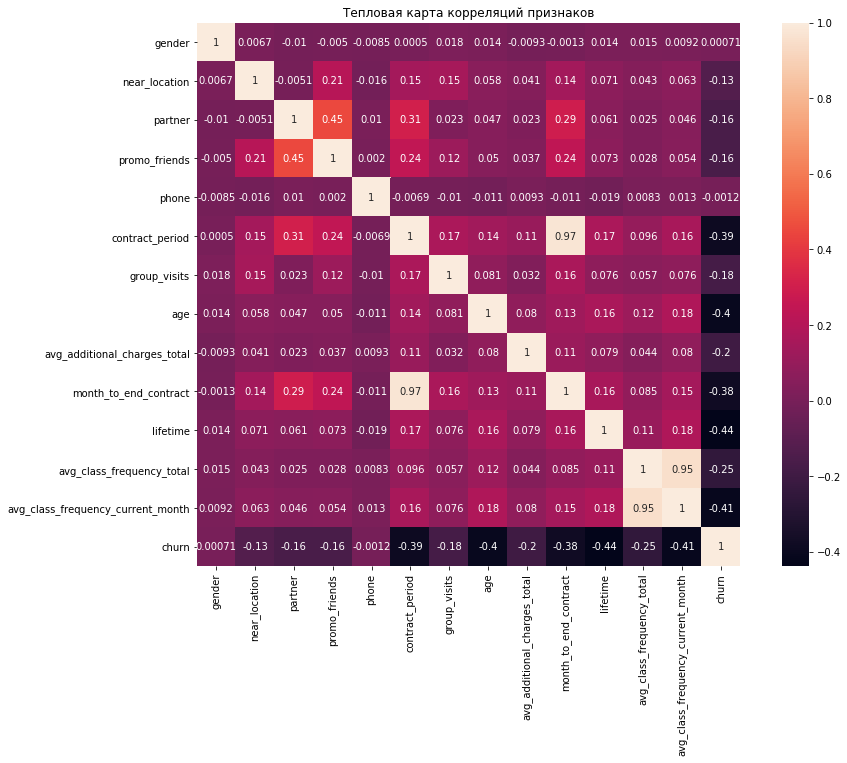

In [15]:
# Отобразим матрицу корреляций при помощи тепловой карты
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(gym_corr, annot = True, square=True)
plt.title('Тепловая карта корреляций признаков');

## ***
У нас выделяются 2 пары сильно коррелирующих признаков:
- contract_period - month_to_end_contract	
- avg_class_frequency_current_month - avg_class_frequency_total 

То есть, чем дольше контракт - тем больше вресени до его окончания
и, сколько клиент посещал, столько и посещает в последний месяц. Все достаточно логично.

Чтобы избежать мультиколлинераности, удалим по одному признаку из каждой пары, в нашему случае month_to_end_contract и avg_class_frequency_current_month

In [16]:
# Удалим столбцы с признаками month_to_end_contract и avg_class_frequency_current_month
gym.drop(['month_to_end_contract', 'avg_class_frequency_current_month'], axis=1, inplace=True)

In [17]:
gym.shape

(4000, 12)

## 6. Модель прогнозирования оттока клиентов<a id="step6"></a>

In [18]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = gym.drop('churn', axis=1)
y = gym['churn'] 

In [19]:
#разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0, stratify=y)

### Логистическая регрессия

In [20]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))

In [21]:
# стандартизируем наши данные
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [22]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)

Метрики для модели логистической регрессии:
	Accuracy: 0.91
	Precision: 0.83
	Recall: 0.83
	F1: 0.83


### Случайный лес

In [23]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) # Ваш код здесь
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities, 
    title = 'Метрики для модели случайного леса:'
)

Метрики для модели случайного леса:
	Accuracy: 0.89
	Precision: 0.81
	Recall: 0.79
	F1: 0.80


** ** **
Модель логистической регрессии дает нам лучшие показатели метрик, чем модель случайного леса. Хотя точность одинаковая для обеих моделей. Метрика Accuracy чувствительна разделению на классы, а у нас это разделение неравномерно. Но остальные метрики также у логистической регрессии лучше.

## 7. Кластеризация клиентов<a id="step7"></a>

In [24]:
# обучаем нормализатор и преобразуем набор данных 
X_sc = scaler.fit_transform(gym.drop('churn', axis = 1))
# Передадим получившуюся стандартизированную таблицу в качестве параметра функции linkage()
linked = linkage(X_sc, method = 'ward') 

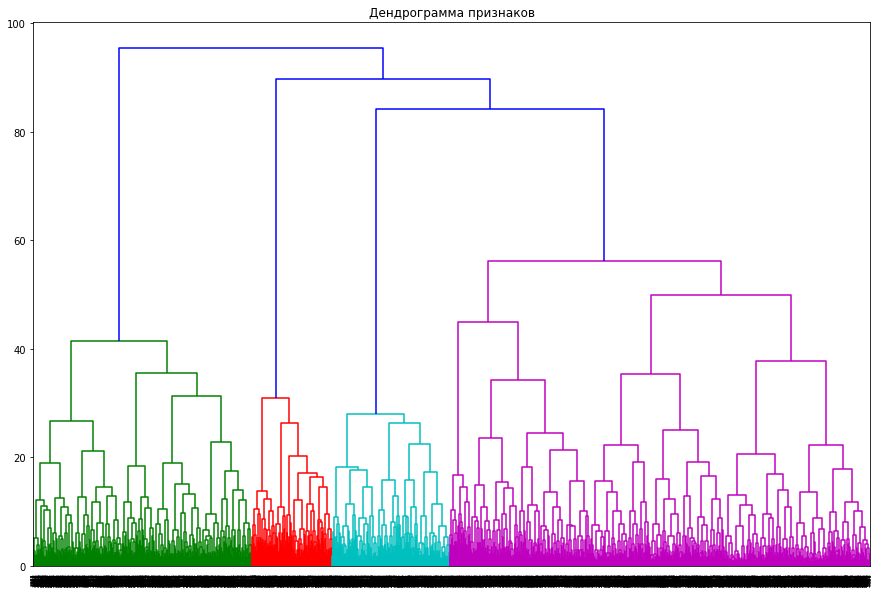

In [25]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма признаков');
plt.show();

## ***
На основании дендрогараммы можно выделить 4 кластера

### Модель K-Means

In [26]:
# зададим алгоритм для новой модели на основе алгоритма K-Mean
km = KMeans(n_clusters = 5, random_state=0) # задаём число кластеров, равное 5 (согласно заданию)
labels = km.fit_predict(X_sc)

In [27]:
# сохраняем метки кластера в поле нашего датасета
gym['cluster'] = labels
# выводим статистику по средним значениям наших признаков по кластеру
gym.groupby(['cluster']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
cluster,,,,,,,,,,,,
0,0.499109,0.000000,0.488414,0.076649,1.0,3.032086,0.235294,28.721925,137.540009,3.060606,1.770413,0.399287
1,0.488571,0.995238,0.955238,0.892381,1.0,7.660952,0.458095,29.543810,155.861428,4.380952,1.978963,0.120952
2,0.505300,1.000000,0.238516,0.059187,1.0,2.819788,0.000000,28.770318,143.383993,3.343640,1.800647,0.381625
3,0.544202,1.000000,0.250287,0.079219,1.0,4.528129,1.000000,29.536165,148.088897,3.761194,1.941342,0.200918
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211,0.266839


## ***
Посмотрев распределение средних признаков по кластерам можно отметить:
1. в каждой группе признаков выделены крайние значения этих признаков и какие-то средние значения для кластеров
2. комбинации этих признаков и дают определенный кластер.
3. относительно равномерно по кластерам распределены следующие признаки: пол, возраст, доптраты(относительно максимума).

Построим распределения признаков с разбивкой по кластерам:

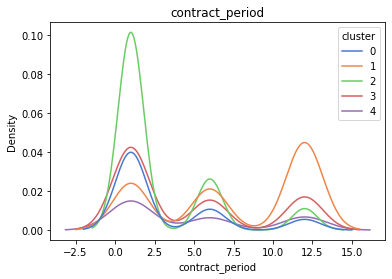

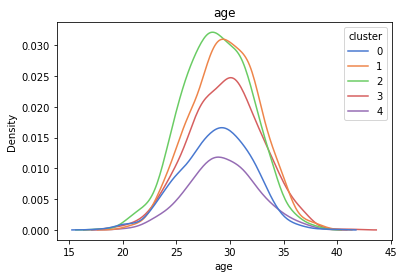

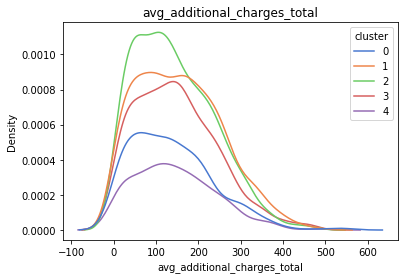

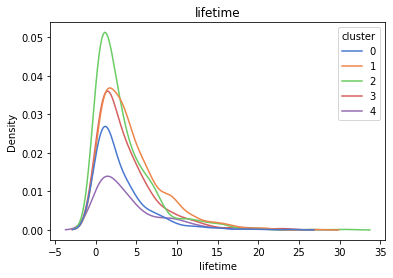

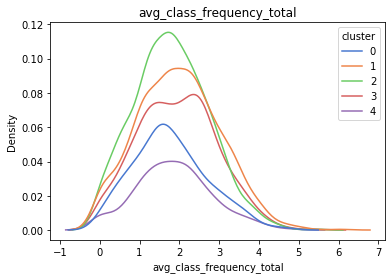

In [28]:
#построим распределения для всех небинарных признаков
kde_list =['contract_period', 'age', 
       'avg_additional_charges_total', 'lifetime',
       'avg_class_frequency_total']

for col in kde_list:
    fig, ax = plt.subplots()
    sns.kdeplot(data = gym, x=col, hue='cluster', palette = 'muted')
    ax.set_title(col) 
    plt.show()

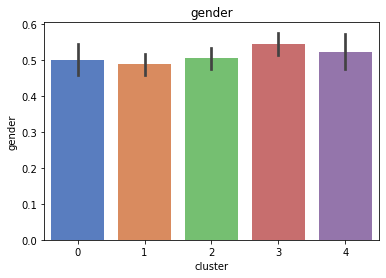

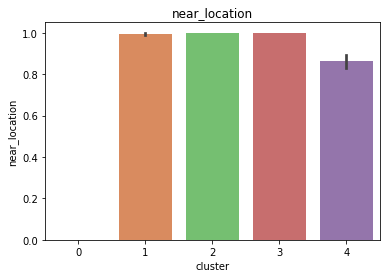

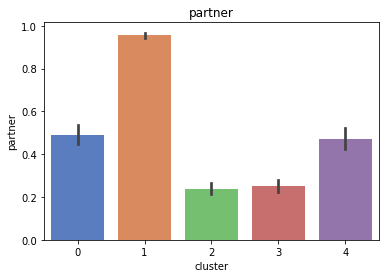

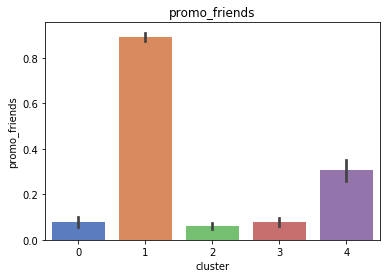

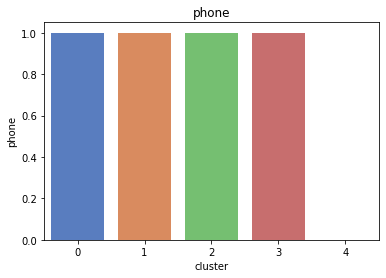

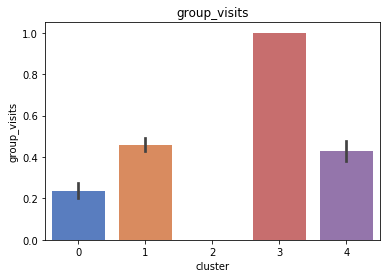

In [29]:
# Построим столбчатые диаграммы для бинарных признаков
bi_list =['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'group_visits']

for col in bi_list:
    fig, ax = plt.subplots()
    sns.barplot(x=gym['cluster'], y=gym[col])
    ax.set_title(col) 
    plt.show()

## ***
По графикам распределения можно отметить, что признаки распределены небинарные - по величине значимости:

1. Кластер №2
2. Кластер №1
3. Кластер №3
4. Кластер №0
5. Кластер №4

Бинарные признаки распределены или равномерно, или c выделением полного отсутствия или присутствия этого признака.

In [30]:
# сгруппируем наш датафрейм по кластерам и посмотрим на среднее значение оттока клиентов.
gym.groupby('cluster')['churn'].mean().reset_index().sort_values('churn', ascending=False)

,cluster,churn
0,0,0.399287
2,2,0.381625
4,4,0.266839
3,3,0.200918
1,1,0.120952


** ** **
Построим кластеры в порядке убывания по величине оттока:
1. Кластер№0 - 40%
2. Кластер№2 - 38%
3. Кластер№4 - 26%
4. Кластер№3 - 20%
5. Кластер№1 - 12%

**Кластер, уходящий в отток - №0.**

Признаки, которыми определяется этот кластер: 
- 0% клиентов живут или работают около фитнеса
- 48% пришли по партнерской программе
- Средние показатели по длительности контракта
- 23% посещают групповые занятия
- возраст 28.7 лет. возрастной признак по кластерам распределен равномерно
- меньше всех тратят на допуслуги 137 единиц. Но в целом этот признак распределен равномерно между кластерами
- низкие показатели по длительности посещения фитнеса. 
- и самые редкопосещающие фитнес 1.77 раза в неделю

Можно также отметить Кластер №2, который также склонен к оттоку(38%) имеет 

- 100% клиентов, который живут или работают около фитнеса
- наименьшее количество людей по партнерской программе 23% и по промо 6%
- низкие показатели по длительности посещения фитнеса. 
- низкие показатели по частоте посещения фитнес 1.8 раза в неделю

**Самый лояльный кластер - №1.**

Признаки, которыми определяется этот кластер: 
- 99% живут или работают около фитнеса
- наибольшее количество людей по партнерской программе 95% и по промо 99%%
- наибольшая длительность абонемента (7.66 месяца)
- больше всех посещают групповые занятия (46%)
- средний возраст - 29.54лет. Признак распределен равномерно между кластерами
- самые высокие показатели по длительности посещения фитнеса (4.38 месяца). 
- больше всех тратят на допуслуги 155 единиц. Но в целом этот признак распределен равномерно между кластерами
- Посещают в среднем 1,97 раза в неделю


## 8. Основные выводы: <a id="step8"></a>

**Загрузка данных:**

- В данных 4000 строк, 14 столбцов
- Все признаки выражены числами, пропущенных значений нет, дубликаты отсутствуют
- 4 признака выражены вещественными числами, 10 - целочисленными
- Названия приведены к нижнему регистру

**Исследовательский анализ данных (EDA)**

- Женщин на 1% больше чем мужчин
- 84% клиентов живут или работают рядом с фитнесом
- 48% клиентов работают в компаниях-партнерах
- 31% клиентов купили абонемент с промо от друга
- 90% предоставили номер телефона
- длительность контрактов от 1 месяца до 12 месяцев, среднее значение 4.68 месяца. При этом медианное значение контракта 1 месяц. Распределение сдвинуто влево.
- 41% клиентов посещают групповые занятия
- Средний возраст клиента 29 лет (от 18 до 41 года), медианное значение возраста также 29 лет.
- В среднем каждый клиент тратит в месяц на дополнительные услуги фитнеса 146 единиц (минимум 0.14, максимум 552 единицы)
- Среднее значение месяцев до конца контракта 4.32
- Среднее значение времени с первого обращения: 3.72 месяца, медиан 3 месяца (самый долгий клиент 31 месяц)
- Частота посещений фитнеса в среднем 1.88 раза в неделю (разброс от 0 до 6 раз в неделю) за все время действия абонемента
- Частота посещений фитнеса в среднем 1.76 раза в неделю за предыдущий месяц. То есть частота посещений снижается со временем.
- 26% клиентов покинули фитнес в текущем месяце.


Среди тех кто ушел и кто остался можно сделать следующие выводы (все сравнения указаны в порядке остался / ушел):
- распределение по возрасту одинаковое
- 87% против 76% среди тех кто живет рядом
- 53 % с партнерсокой программой остались, среди тех кто ушел 35% с партнерской программой
- у тех кто остался 5.74, среди тех кто ушел среднее время конракта 1.72
- 46% и 26% посещали групповые занятия соответственно
- возраст 30 лет и 27 лет
- средний чек на допуслуги: 158 и 115
- время до конца контракта: 5.28 и 1.66. В основном, уходит тот, кому до конца абонемента осталось совсем чуть чуть.
- лайфтайм 4.71 и 0.99. то есть люди позанимавшись месяц, поняли что им это не подходи в силу каких-то причин и уходят.
- Посещение финтнеса в неделю за весь период: 2 и 1.47 в среднем
- Посещение финтнеса в неделю за весь период: 2 и 1 в среднем. У тех кто уходит и посещаемось падает.

В целом все показатели тех, кто оказывается в оттоке ниже. Интересно что и средний возраст тех кто уходит меньше. Видимо пока не так интересно ходить в фитнес.

Выделяются 2 пары сильно коррелирующих признаков:
- contract_period - month_to_end_contract
- avg_class_frequency_current_month - avg_class_frequency_total

То есть, чем дольше контракт - тем больше времени до его окончания и, сколько клиент посещал, столько и посещает в последний месяц. Все достаточно логично.
Чтобы избежать мультиколлинераности, мы удалили по одному признаку из каждой пары, в нашему случае month_to_end_contract и avg_class_frequency_current_month

**Модель прогнозирования оттока клиентов**

Признаки стандартизированы, так как они имеют очень разные по величине стандартные отклонения.

Модель логистической регрессии дает нам лучшие показатели метрик, чем модель случайного леса. Хотя точность одинаковая для обеих моделей. Метрика Accuracy чувствительна разделению на классы, а у нас это разделение неравномерно. Но остальные метрики также у логистической регрессии лучше.

**Кластеризация клиентов**
На основании дендрогараммы можно выделить 4 кластера

**Модель K-Means:**
Посмотрев распределение средних признаков по кластерам можно отметить:

в каждой группе признаков выделены крайние значения этих признаков и какие-то средние значения для кластеров
комбинации этих признаков и дают определенный кластер.
Относительно равномерно по кластерам распределены следующие признаки: пол, возраст, доптраты(относительно максимума).

По графикам распределения можно отметить, что признаки распределены небинарные - по величине значимости:
1. Кластер №2
2. Кластер №1
3. Кластер №3
4. Кластер №0
5. Кластер №4

Бинарные признаки распределены или равномерно, или c выделением полного отсутствия или присутствия этого признака.

Построим кластеры в порядке убывания по величине оттока:
1. Кластер№0 - 40%
2. Кластер№2 - 38%
3. Кластер№4 - 26%
4. Кластер№3 - 20%
5. Кластер№1 - 12%

**Кластер, уходящий в отток - №0.**

Признаки, которыми определяется этот кластер: 
- 0% клиентов живут или работают около фитнеса
- 48% пришли по партнерской программе
- Средние показатели по длительности контракта
- 23% посещают групповые занятия
- возраст 28.7 лет. возрастной признак по кластерам распределен равномерно
- меньше всех тратят на допуслуги 137 единиц. Но в целом этот признак распределен равномерно между кластерами
- низкие показатели по длительности посещения фитнеса. 
- и самые редкопосещающие фитнес 1.77 раза в неделю

**Можно также отметить Кластер №2, который также склонен к оттоку(38%) имеет следующие показатели:**

- 100% клиентов, который живут или работают около фитнеса
- наименьшее количество людей по партнерской программе 23% и по промо 6%
- низкие показатели по длительности посещения фитнеса. 
- низкие показатели по частоте посещения фитнес 1.8 раза в неделю

**Самый лояльный кластер - №1.**

Признаки, которыми определяется этот кластер: 
- 99% живут или работают около фитнеса
- наибольшее количество людей по партнерской программе 95% и по промо 99%%
- наибольшая длительность абонемента (7.66 месяца)
- больше всех посещают групповые занятия (46%)
- средний возраст - 29.54лет. Признак распределен равномерно между кластерами
- самые высокие показатели по длительности посещения фитнеса (4.38 месяца). 
- больше всех тратят на допуслуги 155 единиц. Но в целом этот признак распределен равномерно между кластерами
- Посещают в среднем 1,97 раза в неделю


## 9. Рекомендации: <a id="step9"></a>

Для увеличения лояльности у настоящей аудитории:
1. Продление существующих абонементов на длительный срок по привлекательной цене
2. Увеличение количества занятий и развитие новых интересных групповых направлений
3. Увеличение качества и количества дополнительных услуг для клиентов. Возможно стоит провести опрос по необходимости новых услуг и каких именно не хватает клиентам.

Для новой аудитории:
1. Привлекать большее количество клиентов по партерской программе и промо
2. Приоретизировать длительные абонементы